# Dimensionality Reduction


### Question 1

In [368]:
import numpy as np
from scipy.linalg import svd
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.linalg as la

X = np.array([[0,1],
              [0,0],
              [1,1],
              [0,0],
              [1,1],
              [1,0],
              [1,0],
              [1,1],
              [2,0],
              [2,1]])

mean_mat = 0
std_mat = 0

# Standardizing the matrix
standardized_mat = np.array(ss.zscore(X, axis=0, ddof=1))

# Finding covariance
cov_mat = np.cov(standardized_mat.T)

# Finding Eigenvalues $ Eigenvectors
eig_val, eig_vec = np.linalg.eig(cov_mat)

print("Principal Components:\n", eig_vec)

# Reducing data to 2D
projected_mat = (eig_vec.T[:][0]).T
pca_mat = np.dot(standardized_mat, projected_mat)

print("Projected 1D Matrix:\n", pca_mat)

Principal Components:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Projected 1D Matrix:
 [-0.19166297 -1.53330376  0.76665188 -1.53330376  0.76665188 -0.57498891
 -0.57498891  0.76665188  0.38332594  1.72496673]


### Question 2

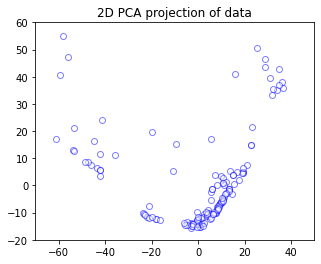

In [363]:
import numpy as np
import glob
import cv2
from matplotlib.image import imread
from matplotlib import pyplot as plt

std_mat = 0
mean_mat = 0
dim = (40, 40)
data_matrix = np.zeros(shape=(0,1600))
img_list = [f for f in glob.glob(".\yalefaces\subject*")]

# Adding images to data matrix
for i in img_list:
    img = imread(i)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    flattened = resized.reshape([1, 1600])
    data_matrix = np.append(data_matrix, flattened, axis=0)

    
# Standardizing the matrix
def standardize(matrix):
    global std_mat
    global mean_mat
    
    std_mat = np.std(data_matrix, axis=0, ddof=1)
    mean_mat = np.mean(data_matrix, axis=0)
    standardized_matrix = (data_matrix - mean_mat)/std_mat
    return standardized_matrix


# Calculate PCA
def pca(matrix, n_dim):
    # Finding covariance
    cov_mat = np.cov(matrix.T)
    
    # Finding Eigenvalues $ Eigenvectors
    eig_val, eig_vec = np.linalg.eig(cov_mat)
    eig_val, eig_vec = eig_val.real, eig_vec.real
    
    # Reducing data to n-th dim
    projected_mat = (eig_vec.T[:][0:n_dim]).T
    pca_mat = np.dot(matrix, projected_mat)
    return pca_mat


standardized_mat = standardize(data_matrix)
pca_matrix = pca(standardized_mat, 2)

# Plotting Data
plt.axis([-70, 50, -20, 60])
plt.title('2D PCA projection of data') 
plt.scatter(pca_matrix[:,0], pca_matrix[:,1], c='w', alpha=0.5, edgecolors='blue')
plt.rcParams["figure.figsize"] = (5,4)
#plt.savefig('.\images\q2_scatterplot.png', dpi=100)


### Question 3

In [362]:
from cv2 import VideoWriter, VideoWriter_fourcc


# subject02.centerlight
img = standardized_mat[0]

# Video metadata
width = 40
height = 40
FPS = 1
seconds = 154

# Video codec and writer
fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./video.avi', fourcc, float(FPS), (width, height))

for i in range((FPS * seconds) + 1):
    proj_img = np.dot(eig_vec.T[:][0:i], img)
    rec_img = np.dot(eig_vec.T[:][0:i].T, proj_img)
    rec_img *= std_mat
    rec_img += mean_mat
    resized = rec_img.reshape(40, 40)
    frame = cv2.cvtColor(resized.astype(np.uint8), cv2.COLOR_BGR2RGB)
    video.write(frame)

video.release()
